In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Loading data

We'll load our CSV created in prepare-data-csv.ipynb

In [101]:
data = pd.read_csv('data/raw/tweets.csv')

In [107]:
data.shape

(9684, 2)

In [102]:
data.head()

,tweets,labels
0,Gas by my house hit $3.39!!!! I\u2019m going t...,positive
1,Theo Walcott is still shit\u002c watch Rafa an...,negative
2,its not that I\u2019m a GSP fan\u002c i just h...,negative
3,Iranian general says Israel\u2019s Iron Dome c...,negative
4,Tehran\u002c Mon Amour: Obama Tried to Establi...,neutral


# Data Cleaning

We'll download the following dictionary to remove emojis <br>
https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py

In [104]:
from emo_unicode import EMOTICONS

In [105]:
def removeLinks(text):
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text

def removeHTMLTags(text):
    text = re.sub(r'<.*?>', '', text, flags=re.MULTILINE)
    return text

def convertToLowerCase(text):
    return text.lower()

def removeWordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

def removePuctuations(text):
    return re.sub(r'[^A-Za-z0-9]+', ' ', text)

def removeWhiteSpaces(text):
    return text.strip()

def decontracted(phrase):
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [106]:
def clean_data(text):
    
    text = str(text)
    text = removeLinks(text)
    text = removeHTMLTags(text)
    text = convertToLowerCase(text)
    text = removeWordsWithNumbers(text)
    text = removeWhiteSpaces(text)
    text = decontracted(text)
    text = removePuctuations(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = text.strip()
    
    return text

In [108]:
cleaned_data = data.dropna(how='any', axis=0)
cleaned_data.shape

(9684, 2)

In [109]:
cleaned_data['tweets'] = cleaned_data['tweets'].apply(clean_data)

In [110]:
cleaned_data.shape

(9684, 2)

In [85]:
data['tweets'].iloc[0]

'Gas by my house hit $3.39!!!! I\\u2019m going to Chapel Hill on Sat. :)'

In [86]:
cleaned_data['tweets'].iloc[0]

'gas by my house hit going to chapel hill on sat'

# EDA

In [87]:
cleaned_data['labels'].value_counts()

neutral     4586
positive    3640
negative    1458
Name: labels, dtype: int64

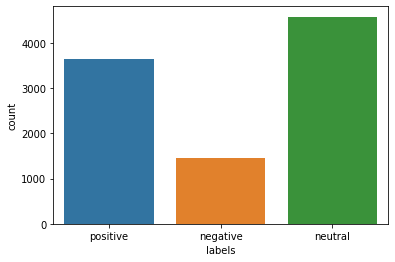

In [92]:
sns.countplot(x='labels', data=cleaned_data)

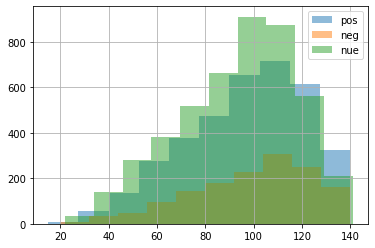

In [98]:
cleaned_data.loc[cleaned_data['labels'] == 'positive', 'tweets'].str.len().hist(label='pos', alpha=.5)
cleaned_data.loc[cleaned_data['labels'] == 'negative', 'tweets'].str.len().hist(label='neg', alpha=.5)
cleaned_data.loc[cleaned_data['labels'] == 'neutral', 'tweets'].str.len().hist(label='nue', alpha=.5)
plt.legend()

Length is not a good differentiator

In [112]:
cleaned_data.to_csv('data/clean/cleaned_data.csv', index=None)